# Numpy versus Scipy

基本的にNumpyの上に成り立っている  
細かい密度関数なども返してくれる  

subpackageの充実

# Statistics

numpyよりも細かい情報を得たいときにScipyを使う  

C:\Users\taishi\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


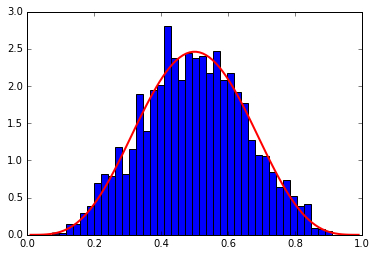

In [2]:
%matplotlib inline
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

q = beta(5, 5)      # Beta(a, b), with a = b = 5
obs = q.rvs(2000)   # 2000 observations
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, q.pdf(grid), 'r-', linewidth=2)
fig.show()

C:\Users\taishi\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


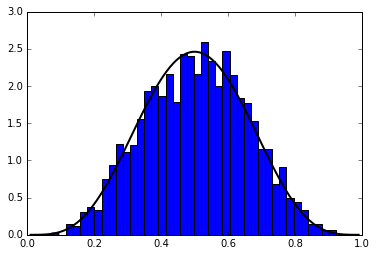

In [8]:
%matplotlib inline
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

obs = beta.rvs(5, 5, size=2000)
grid = np.linspace(0.01, 0.99, 100)

fig, ax = plt.subplots()
ax.hist(obs, bins=40, normed=True)
ax.plot(grid, beta.pdf(grid, 5, 5), 'k-', linewidth=2)
fig.show()

In [3]:
q.cdf(0.4)

0.26656768000000003

In [4]:
q.pdf(0.5)

2.4609375000000009

In [7]:
q.ppf(0.26656768000000003)

0.40000000000000008

In [6]:
q.mean()

0.5

### Other Goodies in scipy.stats

In [9]:
from scipy.stats import linregress

In [10]:
x = np.random.randn(200)

In [15]:
y = 2 * x + 1.5 * np.random.randn(200)

In [16]:
gradient, intercept, r_value, p_value, std_err = linregress(x, y)

In [19]:
gradient, intercept, r_value, p_value, std_err

(2.1192941566855965,
 -0.030972713926238168,
 0.81699092715162158,
 3.1657691465659928e-49,
 0.10630510033227536)

C:\Users\taishi\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


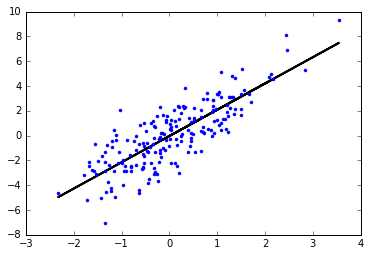

In [20]:
fig, ax = plt.subplots()
ax.plot(x, gradient * x + intercept, 'k-', linewidth=2)
ax.plot(x, y, 'b.')
fig.show()

# Roots and Fixed Points

### Bisection

In [21]:
def bisect(f, a, b, tol=10e-5):
    
    lower, upper = a, b
    
    while upper - lower > tol:
        middle = 0.5 * (upper + lower)
        
        if f(middle) > 0:
            lower, upper = lower, middle
            
        else:
            lower, upper = middle, upper
            
    return 0.5 * (upper + lower)

Scipyのパッケージで上記のように定義されている

In [23]:
from scipy.optimize import bisect

In [24]:
f = lambda x:np.sin(4 * (x - 0.25)) + x + x**20 - 1

In [25]:
bisect(f, 0, 1)

0.4082935042797544

### The Newton-Raphson Method

初期値が悪いと発散する

In [26]:
from scipy.optimize import newton

In [27]:
newton(f, 0.2)

0.40829350427935679

In [28]:
newton(f, 0.7)

0.70017000000002816

In [30]:
newton(f, 0.8)

RuntimeError: Failed to converge after 50 iterations, value is 0.786537727226

In [32]:
timeit bisect(f, 0, 1)

10000 loops, best of 3: 67.3 µs per loop


In [33]:
timeit newton(f, 0.2)

100000 loops, best of 3: 15.1 µs per loop


### Hybrid Methods

In [35]:
from scipy.optimize import brentq

In [36]:
brentq(f, 0, 1)

0.40829350427936706

In [38]:
timeit brentq(f, 0, 1)

The slowest run took 4.49 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 17.1 µs per loop


### Multivariate Root Finding

In [39]:
from scipy.optimize import fsolve

In [40]:
def g(x):
    return x**3 + x**2 + 1

In [41]:
fsolve(g, 0.5)

array([-1.46557123])

### Fixed Points

In [42]:
from scipy.optimize import fixed_point

In [43]:
fixed_point(lambda x: x**2, 10.0)

array(1.0)

# Optimization

In [44]:
from scipy.optimize import fminbound

In [45]:
fminbound(lambda x: x**2, -1, 2) # Search in [-1, 2]

0.0

### Multivariate Optimization

# Integration

In [46]:
from scipy.integrate import quad

In [47]:
integral, error = quad(lambda x: x**2, 0, 1)

In [48]:
integral

0.33333333333333337